# AQI Analysis - Exploring Probability Distributions

## **Introduction**

The ability to determine which type of probability distribution best fits data, calculate z-score, and detect outliers are essential skills in data work. These capabilities enable data professionals to understand how their data is distributed and identify data points that need further examination.

The data includes information about more than 200 sites, identified by state, county, city, and local site names. One of our main goals is to determine which regions need support to make air quality improvements. Given that carbon monoxide is a major air pollutant, we will investigate data from the Air Quality Index (AQI) with respect to carbon monoxide.

## **Step 1: Imports** 

Importing relevant libraries, packages, and modules. For this lab, you will need `numpy`, `pandas`, `matplotlib.pyplot`, `statsmodels.api`, and `scipy`.

In [1]:
# Import relevant libraries, packages, and modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# RUN THIS CELL TO IMPORT THE DATA.
data = pd.read_csv("modified_c4_epa_air_quality.csv")


## **Step 2: Data exploration** 

Displaying the first 10 rows of the data to get a sense of how the data is structured.

In [3]:
# Display first 10 rows of the data.

data.head(10)


,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,2.708050
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,1.098612
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,1.098612
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,1.791759
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,1.945910


The `aqi_log` column represents AQI readings that were transformed logarithmically to suit the objectives of this project.

Why Use Log Transformation?

Normalize Skewed Data: Data that are right-skewed (where many values are low but a few values are very high) can often be transformed to approximate a normal distribution.

Stabilize Variance: Log transformation can stabilize the variance of data, making it more consistent across different levels of an independent variable.

Linearize Relationships: In regression analysis, taking the log of one or both variables can linearize an otherwise exponential relationship, making it easier to model and interpret.

In [4]:
# Display number of rows, number of columns.

data.shape


(260, 8)

Now, we want to find out whether `aqi_log` fits a specific type of probability distribution. We will create a histogram to visualize the distribution of `aqi_log`. Then, based on its shape, we will visually determine if it resembles a particular distribution.

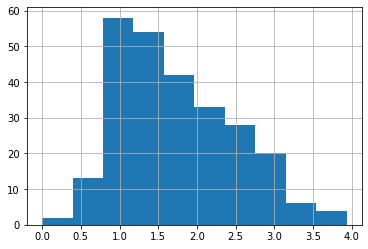

In [5]:
# Create a histogram to visualize distribution of aqi_log.

data['aqi_log'].hist()


There is a slight right skew, but it still appears to be a bell shape. This shape suggests that the distribution of this data should be approximately normal.

## **Step 3: Statistical tests**

We will use the empirical rule to observe the data, then will test and verify that it is normally distributed.


The empirical rule states that, for every normal distribution: 
- 68% of the data fall within 1 standard deviation of the mean
- 95% of the data fall within 2 standard deviations of the mean
- 99.7% of the data fall within 3 standard deviations of the mean


First, we will define two variables to store the mean and standard deviation, respectively, for `aqi_log`. Creating these variables will help us easily access these measures as we continue with the calculations involved in applying the empirical rule. 

In [18]:
# Define variable for aqi_log mean.

aqi_log_mean= data['aqi_log'].mean()

print(aqi_log_mean)



1.7669210929985577


In [8]:
# Define variable for aqi_log standard deviation.
aqi_log_std=data['aqi_log'].std()


# Print out the standard deviation.

print(aqi_log_std)



0.7147155520223721


Now, we will check the first part of the empirical rule: whether 68% of the `aqi_log` data falls within 1 standard deviation of the mean.

To compute the actual percentage of the data that satisfies this criteria, we will define the lower limit (for example, 1 standard deviation below the mean) and the upper limit (for example, 1 standard deviation above the mean). This will enable us to create a range and confirm whether each value falls within it.

In [12]:
## A function to calculate upper and lower limits 
def upper_lower_limits(mean,std,num_of_stds):
    upper_limit=mean+num_of_stds*std
    lower_limit=mean-num_of_stds*std
    return upper_limit, lower_limit

# Display lower_limit, upper_limit.


upper, lower = upper_lower_limits(aqi_log_mean, aqi_log_std, 1)
print("Upper limit:", upper)
print("Lower limit:", lower)

Upper limit: 2.48163664502093
Lower limit: 1.0522055409761855


In [16]:
# Display the actual percentage of data that falls within 1 standard deviation of the mean.

((data['aqi_log']>= lower) & (data['aqi_log']<= upper )).mean()*100


76.15384615384615

76.2 % is within -/+ 1 standard deviation, it should be 68%

Now, we will consider the second part of the empirical rule: whether 95% of the `aqi_log` data falls within 2 standard deviations of the mean.

To compute the actual percentage of the data that satisfies this criteria, we will define the lower limit (for example, 2 standard deviations below the mean) and the upper limit (for example, 2 standard deviations above the mean). This will enable us to create a range and confirm whether each value falls within it.

In [20]:
upper, lower= upper_lower_limits(aqi_log_mean,aqi_log_std,2)

# Display lower_limit, upper_limit.

print("Upper limit:", upper)
print("Lower limit:", lower)


Upper limit: 3.1963521970433018
Lower limit: 0.33748998895381344


In [21]:
# Display the actual percentage of data that falls within 2 standard deviations of the mean.

((data['aqi_log']>= lower) & (data['aqi_log']<=upper)).mean()*100


95.76923076923077

Now, we will consider the third part of the empirical rule:whether 99.7% of the `aqi_log` data falls within 3 standard deviations of the mean.

To compute the actual percentage of the data that satisfies this criteria, we will define the lower limit (for example, 3 standard deviations below the mean) and the upper limit (for example, 3 standard deviations above the mean). This will enable us to create a range and confirm whether each value falls within it.

In [23]:
upper, lower= upper_lower_limits(aqi_log_mean,aqi_log_std,3)

# Display lower_limit, upper_limit.

print("Upper limit:", upper)
print("Lower limit:", lower)

Upper limit: 3.911067749065674
Lower limit: -0.3772255630685586


In [24]:
# Display the actual percentage of data that falls within 3 standard deviations of the mean.

((data['aqi_log']>= lower) & (data['aqi_log']<=upper)).mean()*100



99.61538461538461

## **Step 4: Results and evaluation** 

- About 76.15% of the data falls within 1 standard deviation of the mean.
- About 95.77% of the data falls within 2 standard deviation of the mean.
- About 99.62% of the data falls within 3 standard deviations of the mean.

The 95.77% is very close to 95%, and the 99.62% is very close to 99.7%. The 76.15% is not as close to 68%, but relatively close. Overall, from applying the empirical rule, the data appears to be not exactly normal, but could be considered approximately normal. 

While there are various methods to identify outliers in a dataset, we will utilize the z-score approach. Specifically, a value is considered an outlier if its z-score exceeds 3 in absolute value.

Computing the z-score for every `aqi_log` value. Then, add a column named `z_score` in the data to store those results. 

In [37]:
# Compute the z-score for every aqi_log value, and add a column named z_score in the data to store those results.


data['z-scores']= stats.zscore(data['aqi_log'], ddof=1)
# Display the first 5 rows to ensure that the new column was added.

data[['z-scores']].head(5)


,z-scores
0,0.437265
1,0.034753
2,-0.935070
3,-0.532557
4,-0.532557


Identifying the parts of the data where `aqi_log` is above or below 3 standard deviations of the mean.

In [40]:
# Display data where `aqi_log` is above or below 3 standard deviations of the mean

data[(data['z-scores']<-3) | (data['z-scores']> 3)]

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z-scores
244,2018-01-01,Arizona,Maricopa,Phoenix,WEST PHOENIX,Carbon monoxide,Parts per million,3.931826,3.029044


- There is one potential outlier in AQI log = 3.9 for West Phoenix Arizona, the z-score is 3.0290, It is slightly above the 3 standard deviations of the mean. This means that the air quality at that site is worse than the rest of the sites represented in the data.

- Detecting outliers is important because they can reveal two important things, depending on the context: First, they can identify measurements that were taken incorrectly. Second, they can highlight parts of the data that can be focused on to make improvements.

For example, if the aqi_log for West Phoenix is considered an outlier, then that site can be studied further to determine what practices or changes might improve the air quality.

## **Considerations**

**Summary we would provide to stakeholders**

- The distribution of the `aqi_log` data is approximately normal.
- Using statistical methods, it was determined that the site at West Phoenix has worse air quality than the other sites. 
- Consider allocating more resources toward further examining this site in order to improve its air quality.

**Reference**

US EPA, OAR. 2014, July 8. [Air Data: Air Quality Data Collected at Outdoor Monitors Across the US](https://www.epa.gov/outdoor-air-quality-data). 